In [1]:
from d2l import torch as d2l
import numpy as np
import torch
from torch.utils import data

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

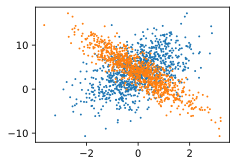

In [6]:
d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features[:,0]), d2l.numpy(labels), 1);
d2l.plt.scatter(d2l.numpy(features[:,1]), d2l.numpy(labels), 1);

In [7]:
def load_array(data_arrays, batch_size, is_train=True):   #@save
    """Construct a PyTorch data iterator"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [8]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [9]:
next(iter(data_iter))

[tensor([[ 1.2176,  0.7790],
         [-0.4219, -0.2858],
         [ 0.9959,  0.0309],
         [ 0.3935,  0.9169],
         [ 0.3897, -0.9635],
         [-0.2069, -0.2232],
         [ 0.9973,  0.0666],
         [-2.0133,  0.3471],
         [ 1.0630,  1.4390],
         [-0.2262,  0.7213]]),
 tensor([[ 3.9823],
         [ 4.3225],
         [ 6.0880],
         [ 1.8656],
         [ 8.2471],
         [ 4.5279],
         [ 5.9781],
         [-1.0115],
         [ 1.4253],
         [ 1.2964]])]

In [10]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [11]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [12]:
loss = nn.MSELoss()

In [13]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [14]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000268
epoch 2, loss 0.000104
epoch 3, loss 0.000105


In [15]:
w = net[0].weight.data
print(f'error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print(f'bias in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0010, -0.0007])
bias in estimating b: tensor([0.0002])


In [37]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
loss = nn.MSELoss(reduction='sum')
trainer = torch.optim.SGD(net.parameters(), lr=0.003)
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.287657
epoch 2, loss 0.104427
epoch 3, loss 0.105858


In [38]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
loss = nn.SmoothL1Loss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 2.255047
epoch 2, loss 0.432441
epoch 3, loss 0.001686
